In [1]:
a = [12, 23, 26, 82, 91, 92, 93, 102, 105, 106, 107, 112, 128, 129, 163, 164, 180, 192, 219, 221, 222, 242, 275, 277, 278, 292, 373, 375, 397, 400, 440, 441, 446, 457, 458, 475, 477, 478, 479, 480, 492, 496, 497, 504, 505, 516, 517, 518, 520, 521, 527, 528, 530, 539, 553, 554, 571, 572, 606, 607, 609, 610, 624, 625, 626, 628, 632, 633, 634, 637, 638, 651, 655, 656, 694, 705, 706, 723, 726, 727, 740, 751, 756, 757, 758, 785, 786, 788, 791, 792, 816, 817, 818, 858, 864, 867, 870, 871, 878, 900, 901, 902, 903, 907, 908, 909, 911, 913, 978, 979, 980, 981, 982, 985, 996, 999, 1001, 1005, 1013, 1015, 1049, 1050, 1053, 1054, 1055, 1065, 1073, 1074, 1094, 1098, 1099, 1119, 1120, 1121, 1126, 1132, 1133, 1135, 1143, 1143, 1145, 1160, 1208, 1209, 1212, 1320, 1321, 1338, 1342, 1343, 1365, 1370, 1376, 1379, 1401, 1415, 1447, 1448, 1449, 1427, 1488, 1490, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1540, 1548, 1550, 1565, 1578, 1579, 1614, 1616, 1618, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1651, 1656, 1657, 1662, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1691, 1695, 1696, 1697, 1703, 1704, 1705, 1722, 1747, 1771, 1778, 1779, 1783, 1784, 1785, 1807, 1808, 1809, 1813, 1820, 1829, 1835, 1838, 1840, 1841, 1844, 1845, 1868, 1866, 1887, 1888, 1889, 1890, 1891, 1925, 1926, 1927, 1939, 1948, 1954, 1955, 1980, 1981, 1982, 1983, 1984, 2106, 2109, 2111, 2138, 2139, 2143, 2146, 2147, 2171, 2176, 2190, 2197, 2211, 2214, 2219, 2223, 2227, 2229, 2230, 2231, 2232, 2241, 2242, 2244, 2247, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2304, 2307, 2314, 2362, 2368, 2369, 2384, 2385, 2386, 2399, 2408, 2419, 2420, 2421, 2428, 2434, 2438, 2441, 2450, 2451, 2453, 2456, 2463, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2487, 2489, 2490, 2495, 2498, 2499, 2501, 2502, 2503, 2506, 2355, 2556, 2575, 2582, 2596, 2602, 2606, 2626, 2650, 2651, 2662, 2663, 2671, 2673, 2674, 2678, 2679, 2680, 2683, 2686, 2688, 2704, 2744, 2773, 2775, 2776, 2784, 2785, 2787, 2802, 2814, 2815, 2840, 2841, 2843, 2884, 2885, 2945, 2946, 2947, 2948, 2969, 2970, 2971, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2992, 2993, 2996, 2997, 3005, 3008, 3012, 3038, 3040, 3041, 3042, 3045, 3046, 3047, 3048, 3071, 3075, 3078, 3110, 3111, 3112, 3123, 3124]
print(len(a))

406


In [2]:
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import math
import torch.nn.functional as F

/home/hoge/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import itertools
import scipy
from sklearn.manifold import TSNE
import optuna
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

In [4]:
dirname_org = "../org+adv_unlim/org"
dirname_adv = "../org+adv_unlim/adv"

In [5]:
img_size = 64 # Image size
batch_size = 16  # Batch size

# Model
z_size = 100
ngf = 32
ndf = 64
generator_layer_size = [256, 512, 1024, 2048]
discriminator_layer_size = [2048, 1024, 512, 256]

# Training
epochs = 100 # Train epochs
learning_rate_G = 2e-5
learning_rate_D = 1e-5

In [6]:
def classification_scorer(X, Y):
    sum = 0
    n1 = 0
    for x1, y1 in zip(X, Y):
        n1 += 1
        n2 = 0
        for x2, y2 in zip(X, Y):
            n2 += 1
            if n1 > n2 and y1 != y2:
                dist = ((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2) + 1e-53
                sum += 1 / dist

    return sum / (len(Y) * (len(Y) - 1) / 2)

In [7]:
class SupervisedTSNE:
    def __init__(self, X, Y, scorer):
        self.X = X
        self.Y = Y
        self.scorer = scorer
        self.best_score = 1e53
        self.best_model = None

    def __call__(self, trial):
        perplexity = trial.suggest_uniform("perplexity", 5, 50)
        early_exaggeration = trial.suggest_uniform("early_exaggeration", 6, 48)
        init = trial.suggest_categorical("init", ["random", "pca"])

        mapper = TSNE(
            perplexity=perplexity, 
            early_exaggeration=early_exaggeration,
            init=init
            )
        embedding = mapper.fit_transform(self.X)
        score = self.scorer(scipy.stats.zscore(embedding), self.Y)

        if self.best_score > score:
            self.best_score = score
            self.best_model = mapper
            
            print(self.best_model)
            title='trial={0}, score={1:.3e}'.format(trial.number, score)
            plt.title(title)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=self.Y, s=3, cmap="jet", alpha=0.5)
            plt.colorbar()
            plt.savefig("tsne_reg_optimized.png", bbox_inches='tight')
            plt.show()      

        return score

In [8]:
# LeNet Model 定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(57600, 128)
        self.fc2 = nn.Linear(128, 26)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        feature = x
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output, feature

pretrained_model = "googlefonts.pth" #事前学習済みMNISTモデル(重みパラメータ)
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

# ネットワークの初期化
model = Net().to(device)
print(model)
# 訓練済みモデルのロード
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))


# モデルを評価モードに設定。本チュートリアルの例では、これはドロップアウト層等を評価モードにするのに必要
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=57600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=26, bias=True)
)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=57600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=26, bias=True)
)

In [9]:
# class rNet(nn.Module):
#     def __init__(self):
#         super(rNet, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, 3, 1)
#         self.conv2 = nn.Conv2d(32, 64, 3, 1)
#         self.dropout1 = nn.Dropout(0.25)
#         self.dropout2 = nn.Dropout(0.5)
#         self.fc1 = nn.Linear(57600, 128)
#         self.fc2 = nn.Linear(128, 1)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = F.max_pool2d(x, 2)
#         x = self.dropout1(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout2(x)
#         x = self.fc2(x)
#         return x
# # 使うデバイス（CPUかGPUか）の定義
# rmodel_list = []
# for i in range(26):
#     pretrained_model = "../GoogleFonts_reg/model/reg_" + chr(i + 65) + ".pth"
#     # ネットワークの初期化
#     rmodel = rNet().to(device)
#     # 訓練済みモデルのロード
#     rmodel.load_state_dict(torch.load(pretrained_model, map_location='cpu'))
#     # モデルを評価モードに設定。本チュートリアルの例では、これはドロップアウト層等を評価モードにするのに必要
#     rmodel.eval()
#     rmodel_list.append(rmodel)

In [10]:
def onehot_encode(label, n_class=26):  
    # ラベルをOne-Hoe形式に変換
    eye = torch.eye(n_class).to(device)
    # ランダムベクトルあるいは画像と連結するために(B, c_class, 1, 1)のTensorにして戻す
    return eye[label].view(-1, n_class, 1, 1)
    
def concat_image_label(image, label, n_class=26):
    # 画像とラベルを連結する
    oh_label = onehot_encode(label, n_class).to(device)       # ラベルをOne-Hot形式に変換
    oh_label = oh_label.expand(16, n_class, 64, 64)  # ラベルを画像サイズに拡大
    return torch.cat((image, oh_label), dim=1)    # 画像とラベルをチャネル方向（dim=1）で連結
 
def concat_noise_label(noise, label, n_class=26):
    # ランダムベクトルとラベルを連結する
    oh_label = onehot_encode(label, n_class).to(device)     # ラベルをOne-Hot形式に変換
    return torch.cat((noise, oh_label), dim=1)  # ランダムベクトルとラベルを連結

In [11]:
class Generator(nn.Module):
    def __init__(self, generator_layer_size, z_size, img_size, class_num):
        super().__init__()
        
        self.z_size = z_size
        self.img_size = img_size
        
        # self.label_emb = nn.Embedding(class_num, class_num)
        
        self.model = nn.Sequential(
            nn.ConvTranspose2d(self.z_size + 26, ngf * 32, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 32),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 32, ngf * 16, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 3, 1, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, 1, 3, 1, 1, bias=False),
            nn.Tanh()
        )
    
    def forward(self, z, labels):
        
        # Reshape z
        # z = z.view(-1, self.z_size)
        
        # One-hot vector to embedding vector
        # c = self.label_emb(labels)
        
        # Concat image & label
        # x = torch.cat([z, c], 1)

        x = concat_noise_label(z, labels)


        # rlabels_list = []
        # for label in rlabels:
        #     l = torch.Tensor([[[label.item()]]])
        #     rlabels_list.append(l)
        # rlabels_list = torch.stack(rlabels_list).to(device)

        # x = torch.cat((x, rlabels_list), dim=1)
        
        # Generator out
        out = self.model(x)
        
        return out
        # return out.view(-1, self.img_size, self.img_size)

In [12]:
generator = Generator(generator_layer_size, z_size, img_size, 26).to(device)
# generator.load_state_dict(torch.load("generator.pth", map_location='cpu'))
generator.load_state_dict(torch.load("../GAN+classifier_c1e-6/model/18.pth", map_location='cpu'))

<All keys matched successfully>

In [13]:
# data = []
# label = []
# for o in range(10):
#     for i in range(1, sum(os.path.isfile(os.path.join(dirname_org + "/" + str(o), name)) for name in os.listdir(dirname_org + "/" + str(o))) + 1):
#         for a in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
#             if os.path.isfile(dirname_adv + "/{}/{}→{}/{}.png".format(o, o, a, i)) == False:
#                 continue
#             # print(np.count_nonzero(img1 - img2))
#             if o != a:
#                 img = np.array(Image.open(dirname_adv + "/{}/{}→{}/{}.png".format(o, o, a, i)).convert("L"))
#                 img = (img == 255) * 2 - 1
#                 img = torch.from_numpy(img.astype(np.float32))
#                 img = img.unsqueeze(0).unsqueeze(0).to(device)
#                 output, feature = model(img)
#                 b = output.max(1, keepdim=True)[1].item()
#                 feature = feature.detach().squeeze(0).cpu().numpy()
#                 # img = list(itertools.chain.from_iterable(img))
#                 data.append(feature)
#                 label.append(b)

# # test_loader = torch.utils.data.DataLoader(
# #     datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
# #             transforms.ToTensor(),
# #             transforms.Normalize((0.5,), (0.5,))
# #             ])), 
# #         batch_size=1, shuffle=False)

# data = np.array(data)
# print(data.shape)
# # print(data.shape)
# label = np.array(label)
# print(label)
# # print(label)

In [14]:
class ImageTransform():
  def __init__(self, mean, std):
    self.data_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Normalize(mean, std)
    ])

  def __call__(self, img):
    return self.data_transform(img)

In [15]:
mean = (0.5,)
std = (0.5,)
images = ImageFolder( "../GoogleFonts/test", transform = ImageTransform(mean, std))
data_loader = DataLoader(images, batch_size=1187, shuffle = False, drop_last=True)

In [16]:
def attack(data, data_grad, target, epsilon, lim):
    for i in range(1, 1001):
        data.requires_grad = False
        sign_data_grad = data_grad.sign()
        perturbed_data = data + epsilon * sign_data_grad
        perturbed_data = torch.clamp(perturbed_data, -1, 1)
        data = perturbed_data
        data.requires_grad = True
        output, feature = model(data)
        loss = F.nll_loss(output, target)
        pred = output.max(1, keepdim=True)[1]
        if pred.item() != target.item():
            break
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data
    return data, pred, i

In [17]:
alphabet_data = []
alphabet_rlabel = []
all_data = []
all_rlabel = []
# Labels 0 ~ 9
zlabels_list = []
sample_images_list = []
for i in [0]:
    z = Variable(torch.randn(200, 100, 1, 1)).to(device)
    zlabels = Variable(torch.LongTensor(np.zeros(200) + i)).to(device)
    sample_images = generator(z, zlabels).data.to("cpu")
    zlabels_list.append(zlabels)
    sample_images_list.append(sample_images)
# zlabels = Variable(torch.LongTensor([i for i in range(26)])).to(device)
# # Generating images
# sample_images = generator(z, zlabels)

# for (images, labels), sample_image, zlabel in zip(data_loader, sample_images_list, zlabels_list):
#     images = torch.cat((images, sample_image.to("cpu")), dim=0)
#     labels = torch.cat((labels, zlabel.to("cpu")), dim=0)
for images, labels in data_loader:
    data = []
    rlabel = []
    for image, label in zip(images, labels):
        image, label = image.unsqueeze(0).to(device), label.unsqueeze(0).type(torch.LongTensor).to(device)
        image.requires_grad = True
        output, feature = model(image)
        feature = feature.detach().squeeze(0).cpu().numpy()
        init_pred = output.max(1, keepdim=True)[1] # 最大の確率のインデックスを取得します。
        # 最初から予測が間違っている場合、攻撃する必要がないため次のイテレーションに進みます。
        if init_pred.item() != label.item():
            continue
        # 損失を計算します
        loss = F.nll_loss(output, label)
        # 既存の勾配を全てゼロにします
        model.zero_grad()
        # 逆伝播させてモデルの勾配を計算します
        loss.backward()
        # データの勾配を取得します
        data_grad = image.grad.data
        perturbed_data, pred, resistance = attack(image, data_grad, label, 0.02, 0)
        # routput = rmodel_list[label](image)
        # routput = routput.item()
        data.append(feature)
        alphabet_data.append(feature)
        rlabel.append(resistance)
        alphabet_rlabel.append(resistance)
        # rlabel.append(Decimal(str(routput)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    for index, (image, label) in enumerate(zip(sample_images_list[i], zlabels_list[i])):
        image, label = image.unsqueeze(0).to(device), label.unsqueeze(0).type(torch.LongTensor).to(device)
        image.requires_grad = True
        output, feature = model(image)
        feature = feature.detach().squeeze(0).cpu().numpy()
        init_pred = output.max(1, keepdim=True)[1] # 最大の確率のインデックスを取得します。
        # 最初から予測が間違っている場合、攻撃する必要がないため次のイテレーションに進みます。
        if init_pred.item() != label.item():
            continue
        # 損失を計算します
        loss = F.nll_loss(output, label)
        # 既存の勾配を全てゼロにします
        model.zero_grad()
        # 逆伝播させてモデルの勾配を計算します
        loss.backward()
        # データの勾配を取得します
        data_grad = image.grad.data
        perturbed_data, pred, resistance = attack(image, data_grad, label, 0.02, 0)
        # routput = rmodel_list[label](image)
        # routput = routput.item()
        data.append(feature)
        alphabet_data.append(feature)
        rlabel.append(resistance)
        alphabet_rlabel.append(resistance)
        if index == 99:
            break
        
    data = np.array(data)
    rlabel = np.array(rlabel)
    all_data.append(data)
    all_rlabel.append(rlabel)
    break
alphabet_data = np.array(alphabet_data)
alphabet_rlabel = np.array(alphabet_rlabel)

In [18]:
# objective = SupervisedTSNE(data, rlabel, classification_scorer)
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)

***** start: tSNE(features) *****


/home/hoge/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hoge/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


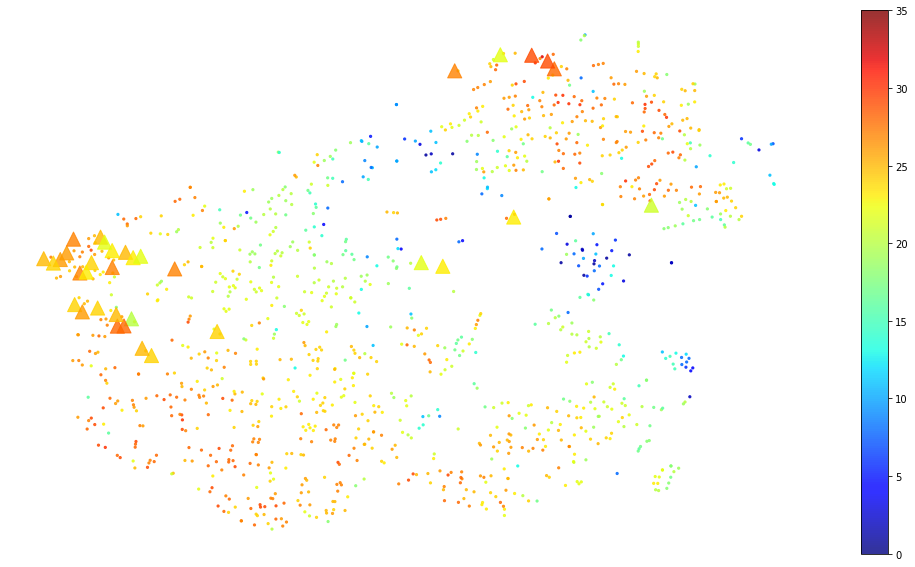

In [19]:
# tSNE
for index, (i, j) in enumerate(zip(all_data, all_rlabel)):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=5000)
    print("***** start: tSNE(features) *****")
    f_decomp = tsne.fit_transform(i)
    plt.figure(figsize=(18, 10))
    plt.scatter(f_decomp[0:1187, 0], f_decomp[0:1187, 1],
                c=j[0:1187], cmap='jet',
                s=5, alpha=0.8, vmin=0, vmax=35)
    plt.scatter(f_decomp[1187:1287, 0], f_decomp[1187:1287, 1],
                c=j[1187:1287], cmap='jet',
                s=200, marker="^", alpha=0.8, vmin=0, vmax=35)
    plt.axis('off')
    plt.colorbar()
    plt.savefig("../GAN+classifier_c1e-6/tsne_{}.png".format(chr(index + 65)), bbox_inches='tight')
    plt.show()


# end2 = time.time()
# elapsed_time =  end2 - end1
# print (f"----- elapsed_time:{elapsed_time:4.2f}[sec] -----")

***** start: tSNE(features) *****


/home/hoge/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hoge/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


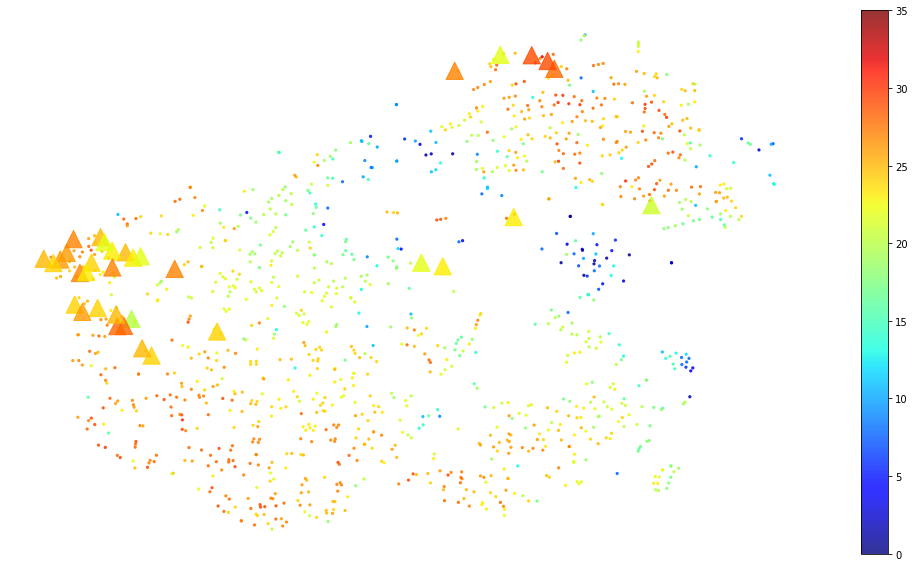

In [20]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=5000)
print("***** start: tSNE(features) *****")
f_decomp = tsne.fit_transform(alphabet_data)
plt.figure(figsize=(18, 10))
plt.scatter(f_decomp[0:1187, 0], f_decomp[0:1187, 1],
            c=alphabet_rlabel[0:1187], cmap='jet',
            s=5, alpha=0.8, vmin=0, vmax=35)
plt.scatter(f_decomp[1187:1287, 0], f_decomp[1187:1287, 1],
            c=alphabet_rlabel[1187:1287], cmap='jet',
            s=300, marker="^", alpha=0.8, vmin=0, vmax=35)
plt.axis('off')
plt.colorbar()
plt.savefig("../GAN+classifier_c1e-6/tsne_all.png", bbox_inches='tight')
plt.show()

In [21]:
print(f_decomp.shape)

(1222, 2)


In [22]:
# plt.figure(figsize=(18, 10))
# plt.scatter(f_decomp[:, 0], f_decomp[:, 1],
#             c=rlabel, cmap='jet',
#             s=3, alpha=0.8)
# plt.axis('off')
# plt.colorbar()
# plt.savefig("tsne_reg.png", bbox_inches='tight')
# plt.show()

In [23]:
print(np.mean(rlabel))

22.04746317512275
